<p>
  <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Escudo-UdeA.svg"
       alt="UdeA logo"
       height="190px"
       align="left"
       hspace="15px">
</p>

<h1 style="margin-top: 20px;"><b>1. Distributions and the Central Limit Theorem</b></h1>

<hr>

<div align="right" style="font-size: 14px; line-height: 1.4;">
  <b>Estiven Castrillon Alzate</b><br>
  Institute of Physics<br>
  <i>Universidad de Antioquia</i><br>
  <span style="font-size: 12px;">Date: December 18, 2025</span>
</div>

<br><br>

## Table of Contents
1. [Introduction](#introduction)
2. [Theory](#theory)
3. [Experimental setup and data acquisition](#experimental-setup-and-data-acquisition)
4. [Analysis and code](#analysis-and-code)
    - [Experiment 1: marble diameters](#first-experiment-marble-diameters)
    - [Experiment 2: Geiger detector](#second-experiment-geiger-detector)
5. [Results](#results)
6. [Conclusions](#conclusions)
7. [References](#references)

# Introduction

This activity aims to apply the basic statistical concepts learned so far to the analysis of problems, and to understand the implications of the central limit theorem and the statistical sample size in an experimental context.

- The notebook will be divided into two parts: the first one focuses on the diameter of the marbles and all related points; the second one focuses on the Geiger detector count and all related points.

The application of these mathematical and statistical measures is done in data from a Geiger detector and from the measurement of the diameter of marbles. The data were collected in the laboratory of the Institute of Physics at the Universidad de Antioquia.

--- 

**NOTE 1:** The original data columns in this notebook are in spanish, so here it is a translation to english:

- In the data `total_marbles_data` the column `diametro_canicas` is translated to `marbles_diameter`

- In the data `geiger_data` the column `particulas_geiger` is translated to `geiger_particles`

**NOTE 2:** The statistics used to plot the histograms is the density option from seaborn (Seaborn.histplot - Seaborn 0.12.2 documentation, n.d.), which normalizes the histogram such that the total **area** is equal to 1.4

# Theory

Let's remember that the Central Limit Theorem (CLT) states that the distribution of the sum (or average) of a large number of independent, identically distributed random variables approaches a normal distribution, regardless of the original distribution of the variables. This theorem is fundamental in statistics because it justifies the use of the normal distribution in many practical situations.

Also, the mathematical expression for a Gaussian (normal) distribution is given by:
$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$
where:
- $\left( \mu \right)$ is the mean of the distribution,
- $\left( \sigma \right)$ is the standard deviation,
- $\left( e \right)$ is the base of the natural logarithm,
- $\left( \pi \right)$ is the mathematical constant Pi.

Also, \mu and \sigma can be estimated from a sample of data using the following formulas:
- Sample mean (\( \bar{x} \)):
$$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$
- Sample standard deviation (s):
$$s = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}$$
where \( N \) is the number of observations in the sample, and \( x_i \) are the individual observations.   

Note that more theorical explanations will be given in each section of the notebook when needed.

# Experimental setup and data acquisition


The experiment was divided into two complementary parts to explore different statistical distributions in physical phenomena. For the first part, marble diameters were measured using precision instruments at the Institute of Physics laboratory, Universidad de Antioquia, specifically using a caliper from UYUSTOOLS model CLA006 vernier caliper, for more information refer to the manufacturer website: https://uyustools.com/. 

A total of 250 marble diameter measurements were collected and recorded in millimeters, with an initial subset of 15 measurements taken by our group and subsequently expanded to include the complete dataset from all laboratory groups. For the second part, a Geiger-Müller detector was employed to count radioactive particle detection events over 302 consecutive time intervals of 10 seconds each, totaling approximately 1,000 seconds of continuous measurement. The detector recorded the number of particles detected in each interval, generating a discrete counting dataset suitable for Poisson distribution analysis. All data were systematically organized and analyzed using Python libraries including NumPy, Pandas, Matplotlib, and Seaborn, with statistical visualizations normalized using density histograms where the total area equals unity.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import integrate, special
from warnings import filterwarnings

filterwarnings("ignore")

# Analysis and code

Here there will be the answers for each question of the experimental hipothesis.

## First experiment: marble diameters.

In [2]:
# marbles_data = pd.read_excel(
#     'laboratory_data_geiger_detector_marbles_diameters.xlsx',
#     sheet_name='marble_diameters'
# )

marbles_data_json = (
    '{"diameter(mm)":{"0":15.82,"1":15.7,"2":16.31,"3":16.37,"4":15.19,'
    '"5":15.77,"6":16.05,"7":15.59,"8":15.61,"9":15.47,"10":15.82,'
    '"11":15.43,"12":16.51,"13":15.67,"14":15.64}}'
)

marbles_data = pd.read_json(marbles_data_json).sort_index()

print(f'Data size: {marbles_data.shape}')
display(marbles_data.head(2))

Data size: (15, 1)


,diameter(mm)
0,15.82
1,15.70


1. Plot the set of marble diameter measurements taken by your group (a histogram) and analyze the data distribution. Does it have the shape of a Gaussian distribution? Are there enough data points to draw any conclusion? Report the measures of central tendency ($\bar{x}$, $s$).

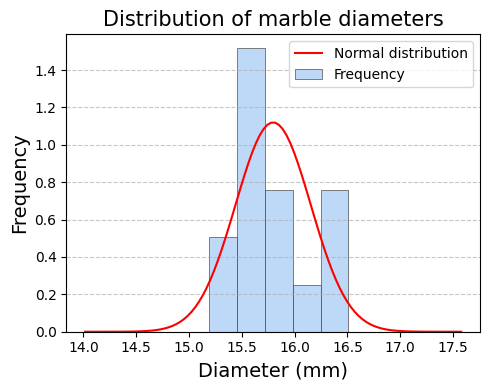

In [3]:
# Histogram
plt.figure(figsize=(5, 4))
sns.histplot(
    marbles_data, alpha=0.7, stat='density',
    label='Marble diameter', color='blue', palette="pastel",
    edgecolor=".3", linewidth=.5
)

# Definition of the normal distribution function
def normal_distribution(x, mu, sigma):
    normal = (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
        -0.5 * ((x - mu) / sigma) ** 2
    )
    return normal

# Defining parameters for the normal probability density function
mu, std = float(np.mean(marbles_data)), float(np.std(marbles_data))
x = np.linspace(mu - 5 * std, mu + 5 * std, 100)
result = normal_distribution(x, mu, std)

# Line plot for the normal probability density function
plt.plot(
    x,
    result,
    color='r',
    label='Normal distribution'
)

# Titles, labels, and parameters
plt.title('Distribution of marble diameters', fontsize=15)
plt.xlabel('Diameter (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Normal distribution', 'Frequency'])
plt.tight_layout()

plt.show()


- **Answer 1:** The data distribution may be normal based on the shape shown by the histogram; however, there are not enough data points to verify this precisely and to fully identify a normal distribution. Furthermore, the fit of the Gaussian probability function indicates that the diameter values are still far from the expected distribution.
Overall, a Gaussian distribution cannot be determined only using our eyes, there has to be a mathematical definition that produces enough certainty to decide if it follows or not a distribution. More of these tests can be further explored in Širca (2016, chap. 10). 

In [4]:
print(
    f'---Measures of central tendency---\n'
    f'(μ) mean = {round(mu, 2)}, (σ) standard deviation = {round(std, 2)}'
)


---Measures of central tendency---
(μ) mean = 15.8, (σ) standard deviation = 0.36


2. Repeat the process from the previous item, but using the entire dataset available in the Excel table.


In [5]:
# Data import from files
# total_marbles_data = pd.read_excel(
#     'laboratory_data_geiger_detector_marbles_diameters.xlsx',
#     sheet_name='total_marbles_data',
#     dtype='float'
# )

# Importación de datos desde archivo json extraido del archivo excel
total_marbles_data_json = '{"diametro_canicas":{"0":16.43,"1":16.37,"2":16.46,"3":15.58,"4":16.53,"5":16.28,"6":15.6,"7":15.84,"8":16.47,"9":15.53,"10":15.65,"11":16.3,"12":16.0,"13":15.55,"14":16.26,"15":16.46,"16":15.82,"17":15.97,"18":15.86,"19":16.04,"20":16.19,"21":16.47,"22":15.6,"23":16.18,"24":16.7,"25":16.49,"26":15.85,"27":15.43,"28":15.75,"29":15.43,"30":15.63,"31":15.73,"32":15.7,"33":15.91,"34":16.52,"35":15.94,"36":15.63,"37":15.83,"38":15.26,"39":15.67,"40":15.77,"41":15.85,"42":15.24,"43":15.18,"44":15.84,"45":15.82,"46":15.76,"47":15.78,"48":15.7,"49":16.03,"50":15.53,"51":16.11,"52":15.34,"53":15.65,"54":15.74,"55":16.04,"56":15.83,"57":16.31,"58":15.79,"59":15.97,"60":15.54,"61":15.55,"62":15.65,"63":15.76,"64":15.93,"65":16.27,"66":16.35,"67":16.4,"68":16.5,"69":16.78,"70":16.16,"71":16.3,"72":15.93,"73":15.99,"74":16.37,"75":15.72,"76":15.39,"77":16.09,"78":15.66,"79":16.2,"80":16.27,"81":16.15,"82":16.91,"83":16.7,"84":16.91,"85":15.6,"86":16.27,"87":15.67,"88":16.66,"89":15.52,"90":16.32,"91":15.71,"92":16.53,"93":16.12,"94":15.44,"95":15.95,"96":15.73,"97":15.93,"98":16.23,"99":15.81,"100":15.95,"101":16.29,"102":15.65,"103":15.76,"104":15.63,"105":16.1,"106":16.16,"107":16.18,"108":16.52,"109":16.09,"110":15.67,"111":16.24,"112":16.28,"113":16.2,"114":16.13,"115":15.72,"116":15.71,"117":15.72,"118":15.73,"119":15.74,"120":15.83,"121":15.67,"122":15.87,"123":15.91,"124":15.81,"125":15.79,"126":15.83,"127":15.78,"128":16.62,"129":15.95,"130":15.48,"131":16.32,"132":15.69,"133":15.81,"134":15.47,"135":15.39,"136":15.47,"137":15.55,"138":15.27,"139":14.87,"140":15.64,"141":15.14,"142":15.99,"143":16.02,"144":15.7,"145":16.02,"146":16.18,"147":15.11,"148":15.7,"149":16.05,"150":15.82,"151":15.7,"152":16.31,"153":16.37,"154":15.19,"155":15.77,"156":16.05,"157":15.59,"158":15.61,"159":15.47,"160":16.07,"161":15.74,"162":16.14,"163":15.55,"164":15.65,"165":16.23,"166":16.01,"167":15.78,"168":15.53,"169":16.1,"170":15.97,"171":15.8,"172":15.5,"173":15.92,"174":16.06,"175":16.21,"176":16.0,"177":15.95,"178":16.32,"179":15.7,"180":15.8,"181":15.9,"182":15.85,"183":16.11,"184":15.75,"185":16.2,"186":16.03,"187":15.71,"188":16.42,"189":15.61,"190":15.77,"191":15.83,"192":15.94,"193":15.95,"194":16.04,"195":16.06,"196":15.89,"197":16.28,"198":16.42,"199":15.65,"200":15.8,"201":16.16,"202":15.05,"203":15.55,"204":15.18,"205":15.88,"206":15.95,"207":16.42,"208":15.9,"209":15.54,"210":15.26,"211":15.65,"212":15.99,"213":15.06,"214":15.78,"215":15.57,"216":15.06,"217":15.9,"218":15.81,"219":15.47,"220":16.5,"221":16.37,"222":15.7,"223":16.1,"224":15.93,"225":16.13,"226":16.44,"227":16.24,"228":15.85,"229":16.74,"230":15.91,"231":16.0,"232":15.7,"233":14.01,"234":15.75,"235":16.25,"236":16.48,"237":16.21,"238":15.98,"239":16.01,"240":15.55,"241":16.19,"242":15.73,"243":15.91,"244":15.93,"245":16.29,"246":15.43,"247":15.27,"248":15.48,"249":15.36}}'
total_marbles_data = pd.read_json(total_marbles_data_json).sort_index()

print(f'Data size: {total_marbles_data.shape}')

total_marbles_data.head(2)

Data size: (250, 1)


,diametro_canicas
0,16.43
1,16.37


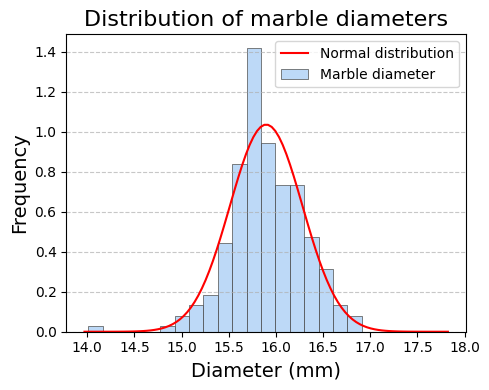

In [6]:
# Histogram
plt.figure(figsize=(5, 4))
sns.histplot(
    total_marbles_data,
    alpha=0.7,
    stat='density',
    label='Marble diameter',
    color='blue',
    palette="pastel",
    edgecolor=".3",
    linewidth=.5
)

# Defining parameters for the normal probability density function
mu, sigma = (
    float(np.mean(total_marbles_data)),
    float(np.std(total_marbles_data))
)
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 100)
result = normal_distribution(x, mu, sigma)

# Line plot for the normal probability density function
plt.plot(
    x,
    result,
    color='r',
    label='Normal distribution'
)

# Titles, labels, and parameters
plt.title('Distribution of marble diameters', fontsize=16)
plt.xlabel('Diameter (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

- **Answer 2:** Using the complete dataset available in the Excel table, the distribution is now clearly normal. Additionally, the Gaussian probability function curve, computed using the mean and standard deviation of the dataset, fits satisfactorily to the distribution shown in the histogram.

In [7]:
print(
    f'---Measures of central tendency---\n'
    f'(μ) mean = {round(mu, 2)}, (σ) standard deviation = {round(sigma, 2)}'
)

---Measures of central tendency---
(μ) mean = 15.9, (σ) standard deviation = 0.39


3. Apply the central limit theorem by analyzing the distribution of the mean values of data subsets of different (increasing) sizes. Discuss the behavior of the measures of central tendency (μ, σ).

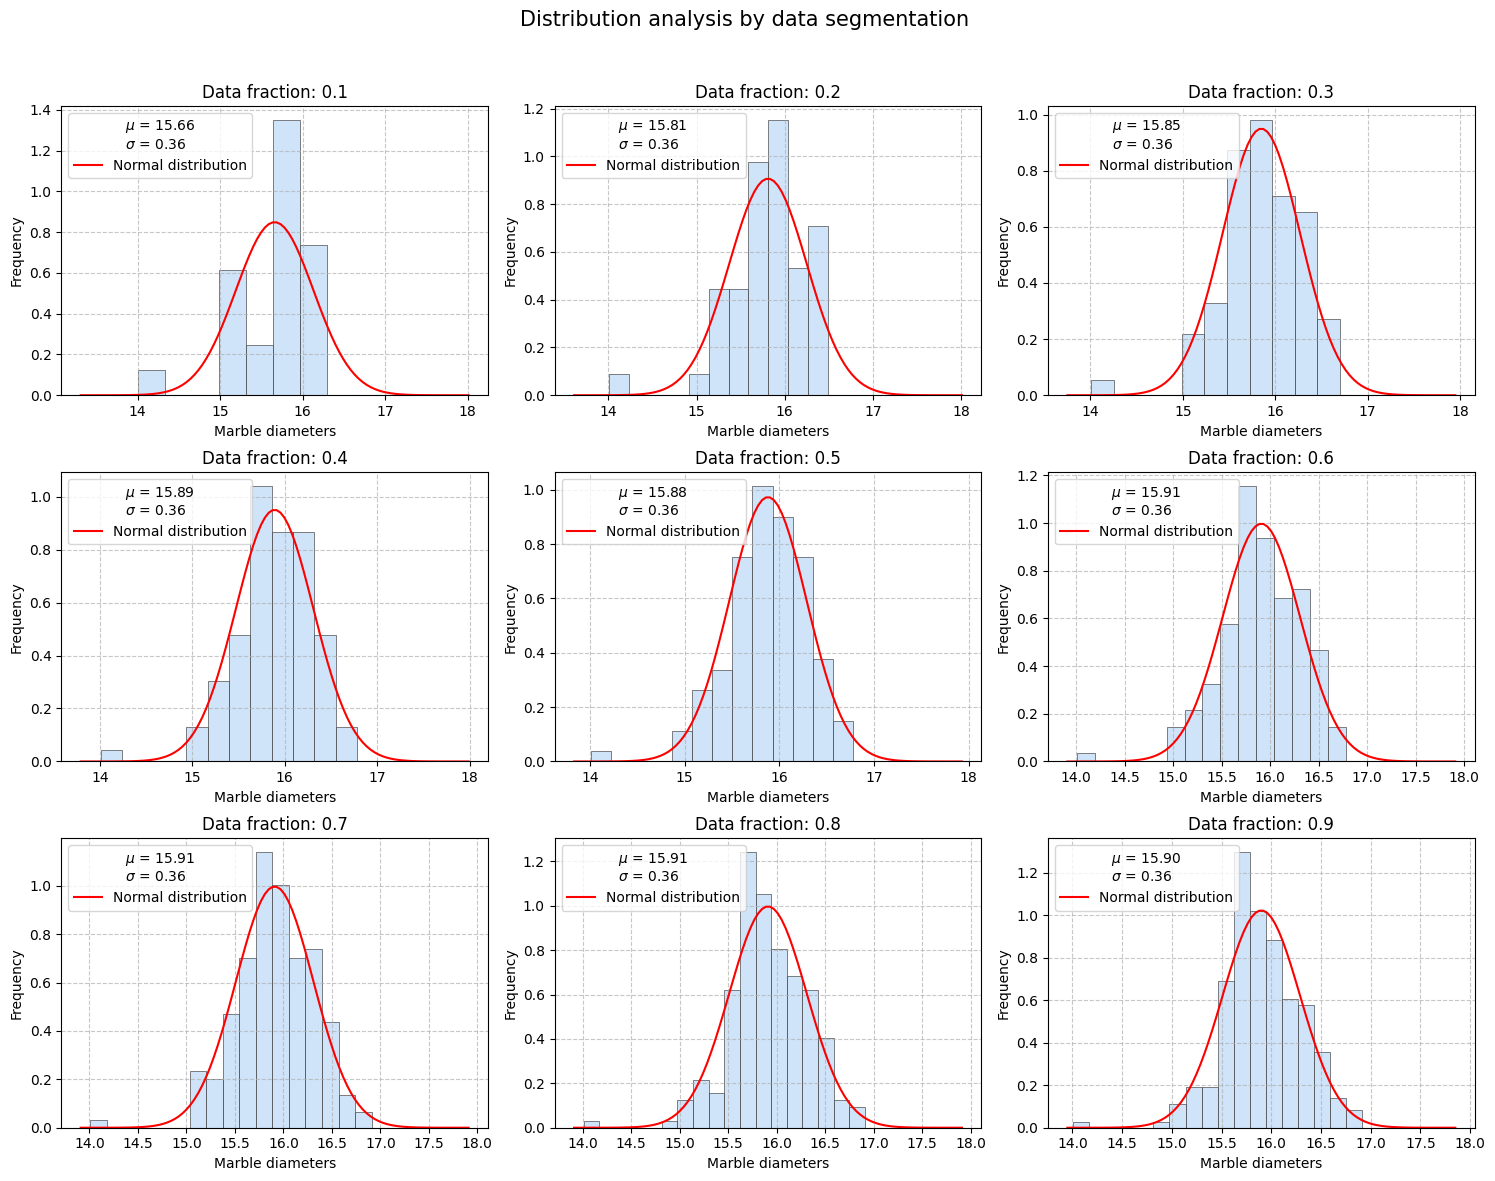

In [8]:
num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
sample_fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Fractions of the data to be used

# Defining a loop to plot each distribution for each data fraction
for i, fraction in enumerate(sample_fractions):
    row = i // num_cols
    col = i % num_cols

    # Taking data samples
    data_fraction = total_marbles_data.sample(frac=fraction, random_state=73)

    # Parameters for the normal function
    mu = float(round(np.mean(data_fraction), 2))
    sigma = float(round(np.std(data_fraction), 2))

    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 100)
    result = normal_distribution(x, mu, sigma)

    ax = axes[row, col]

    # Histogram
    sns.histplot(
        data_fraction,
        stat='density',
        alpha=0.5,
        color='blue',
        palette="pastel",
        edgecolor=".3",
        linewidth=.5,
        ax=ax
    )

    # Normal probability density line plot
    ax.plot(
        x,
        result,
        color='r',
        label='Normal distribution'
    )

    ax.set_xlabel('Marble diameters')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Data fraction: {fraction}')
    ax.legend()
    ax.grid(linestyle='--', alpha=0.7)

    # Display mean and standard deviation
    legend_text = f'$\mu$ = {mu:.2f} \n$\sigma $ = {std:.2f}'
    ax.legend(loc='upper left', title=legend_text)

fig.suptitle('Distribution analysis by data segmentation', fontsize=15)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()


- The distributions shown in the histograms reflect a clear normal distribution when the full dataset is used; however, even when taking smaller samples, the distribution is still noticeable, although to a lesser extent.

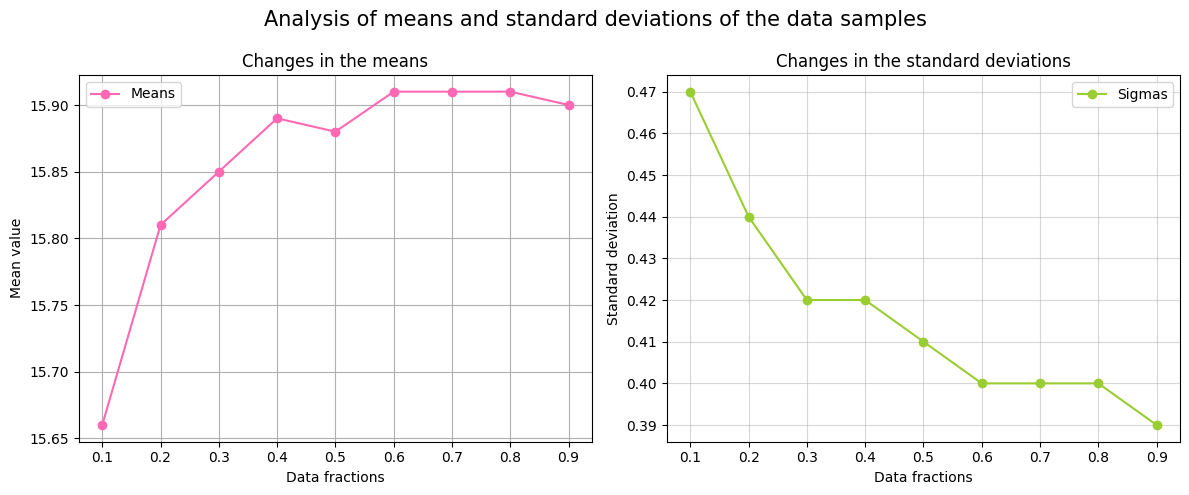

In [9]:
means, sigmas = [], []

# Computation of standard deviations and means of the samples
for fraction in sample_fractions:
    data_fraction = total_marbles_data.sample(frac=fraction, random_state=73)
    number_of_data = len(total_marbles_data)

    mu = float(round(np.mean(data_fraction), 2))
    sigma = float(round(np.std(data_fraction), 2))

    means.append(mu)
    sigmas.append(sigma)

# DataFrame with data fractions, means, and corresponding standard deviations
distribution_measures = pd.DataFrame(
    list(zip(sample_fractions, means, sigmas)),
    columns=['fractions', 'means', 'sigmas']
)

distribution_measures

# Plots of the change in standard deviations and means of the data samples
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Mean values plot
axs[0].plot(
    distribution_measures['fractions'],
    distribution_measures['means'],
    marker='o',
    color='hotpink',
    label='Means'
)

axs[0].set_title('Changes in the means')
axs[0].set_xlabel('Data fractions')
axs[0].set_ylabel('Mean value')
axs[0].grid()
axs[0].legend()

# Standard deviation plot
axs[1].plot(
    distribution_measures['fractions'],
    distribution_measures['sigmas'],
    marker='o',
    color='yellowgreen',
    label='Sigmas'
)

axs[1].set_title('Changes in the standard deviations')
axs[1].set_xlabel('Data fractions')
axs[1].set_ylabel('Standard deviation')
axs[1].grid(alpha=0.5)
axs[1].legend()

fig.tight_layout()
fig.suptitle(
    'Analysis of means and standard deviations of the data samples',
    fontsize=15
)
fig.subplots_adjust(top=0.85)

plt.show()

- **Answer 2:** The behavior of the standard deviation in the random samples taken shows a decreasing trend with respect to the data fractions used in each sample, while the means or averages show an increasing trend.

- Both values tend to approach a specific value: in the case of the means, a value close to 15.9; in the case of the standard deviations, a value close to 0.39.

Applying the Central Limit Theorem:

According to the C.L.T., the mean of the total dataset is equal to the average of the sample means, and the standard deviation is given by  

$$\sigma = \frac{S}{\sqrt{N}}$$

where $S$ is the standard deviation of the sample means and $N$ is the total number of data points.


In [11]:
# Applying the Central Limit Theorem
clt_mean = np.mean(distribution_measures['means'])
clt_sigma = np.std(
    distribution_measures['means'] / np.sqrt(len(total_marbles_data))
)

total_mean = np.mean(total_marbles_data['diametro_canicas'])
total_sigma = np.std(total_marbles_data['diametro_canicas'])

# Comparison between the means and standard deviations obtained
# and those predicted by the C.L.T.
print(
    f'---Measures of central tendency---\n'
    f'(μ) C.L.T. mean = {round(clt_mean, 3)}, '
    f'(σ) C.L.T. standard deviation = {round(clt_sigma, 3)}\n'
    f'(μ) total mean = {round(total_mean, 3)}, '
    f'(σ) total standard deviation = {round(total_sigma, 3)}'
)


---Measures of central tendency---
(μ) C.L.T. mean = 15.858, (σ) C.L.T. standard deviation = 0.005
(μ) total mean = 15.897, (σ) total standard deviation = 0.385


**C.L.T. Conclusion:** The mean calculated using the Central Limit Theorem is very similar to the mean of the total marble diameter dataset; however, the standard deviation is not. This discrepancy may be due to systematic errors in the measurements.

4. Compute the probability that the diameter of a marble lies between 14.52 mm and 16.35 mm.

In [12]:
# Integrating the normal_distribution() function from 14.52 to 16.35
lower_limit = 14.52
upper_limit = 16.35

definite_integral, _ = integrate.quad(
    normal_distribution,
    lower_limit,
    upper_limit,
    args=(mu, sigma)
)

print(
    f'Probability that the diameter lies between 14.52 mm and 16.35 mm: '
    f'{round(definite_integral, 4) * 100}%'
)

Probability that the diameter lies between 14.52 mm and 16.35 mm: 87.55%


In [13]:
# Integrating the normal_distribution() function from 17.00 mm to infinity
lower_limit = 17.00
upper_limit = np.inf

definite_integral, _ = integrate.quad(
    normal_distribution,
    lower_limit,
    upper_limit,
    args=(mu, sigma)
)

print(
    f'Probability that the diameter lies between 17.00 mm and infinity: '
    f'{round(definite_integral, 4) * 100}%'
)

Probability that the diameter lies between 17.00 mm and infinity: 0.24%


6. What is the probability that, when measuring another marble, its diameter is smaller than 14.23 mm?

In [14]:
# Integrating the normal_distribution() function from -infinity to 14.23 mm
lower_limit = -np.inf
upper_limit = 14.23

definite_integral, _ = integrate.quad(
    normal_distribution,
    lower_limit,
    upper_limit,
    args=(mu, sigma)
)

print(
    f'Probability that the diameter is smaller than 14.23 mm: '
    f'{round(definite_integral * 100, 4)}%'
)

Probability that the diameter is smaller than 14.23 mm: 0.0009%


## Second experiment: Geiger detector

In [15]:
# geiger_data = pd.read_excel(
#     'laboratory_data_geiger_detector_marbles_diameters.xlsx',
#     sheet_name='total_geiger_data',
#     dtype='int'
# )
geiger_data_json = '{"particulas_geiger":{"0":6,"1":2,"2":6,"3":3,"4":4,"5":4,"6":2,"7":4,"8":3,"9":9,"10":5,"11":3,"12":3,"13":0,"14":4,"15":2,"16":5,"17":4,"18":3,"19":2,"20":2,"21":2,"22":3,"23":2,"24":5,"25":3,"26":4,"27":2,"28":3,"29":1,"30":6,"31":5,"32":2,"33":4,"34":4,"35":1,"36":6,"37":1,"38":6,"39":5,"40":4,"41":2,"42":4,"43":4,"44":4,"45":3,"46":3,"47":2,"48":4,"49":2,"50":1,"51":2,"52":2,"53":3,"54":2,"55":4,"56":2,"57":3,"58":3,"59":0,"60":3,"61":4,"62":3,"63":4,"64":3,"65":1,"66":2,"67":0,"68":4,"69":4,"70":3,"71":2,"72":2,"73":3,"74":3,"75":4,"76":2,"77":6,"78":3,"79":2,"80":4,"81":3,"82":2,"83":2,"84":1,"85":3,"86":3,"87":5,"88":3,"89":5,"90":2,"91":7,"92":1,"93":4,"94":3,"95":1,"96":5,"97":1,"98":2,"99":4,"100":2,"101":4,"102":3,"103":6,"104":1,"105":4,"106":4,"107":2,"108":4,"109":3,"110":2,"111":4,"112":2,"113":3,"114":2,"115":1,"116":2,"117":3,"118":5,"119":2,"120":4,"121":3,"122":3,"123":4,"124":4,"125":4,"126":3,"127":7,"128":3,"129":1,"130":7,"131":1,"132":2,"133":4,"134":3,"135":3,"136":6,"137":4,"138":1,"139":4,"140":4,"141":2,"142":2,"143":2,"144":4,"145":5,"146":3,"147":2,"148":4,"149":1,"150":3,"151":6,"152":4,"153":7,"154":6,"155":3,"156":3,"157":3,"158":2,"159":1,"160":1,"161":1,"162":9,"163":2,"164":3,"165":3,"166":6,"167":2,"168":3,"169":1,"170":5,"171":0,"172":0,"173":3,"174":2,"175":3,"176":0,"177":0,"178":2,"179":3,"180":2,"181":3,"182":1,"183":4,"184":0,"185":3,"186":4,"187":0,"188":4,"189":2,"190":1,"191":2,"192":1,"193":5,"194":1,"195":1,"196":3,"197":2,"198":3,"199":1,"200":4,"201":5,"202":2,"203":4,"204":1,"205":1,"206":3,"207":1,"208":4,"209":0,"210":5,"211":2,"212":1,"213":1,"214":1,"215":0,"216":3,"217":0,"218":6,"219":3,"220":3,"221":1,"222":5,"223":4,"224":4,"225":1,"226":3,"227":2,"228":4,"229":5,"230":2,"231":0,"232":2,"233":3,"234":4,"235":3,"236":1,"237":5,"238":2,"239":4,"240":1,"241":7,"242":2,"243":3,"244":1,"245":8,"246":2,"247":6,"248":4,"249":1,"250":6,"251":3,"252":3,"253":6,"254":2,"255":4,"256":3,"257":4,"258":3,"259":5,"260":3,"261":1,"262":2,"263":4,"264":1,"265":1,"266":3,"267":1,"268":4,"269":0,"270":5,"271":2,"272":1,"273":1,"274":1,"275":0,"276":3,"277":0,"278":6,"279":3,"280":3,"281":1,"282":3,"283":2,"284":2,"285":2,"286":1,"287":3,"288":4,"289":6,"290":6,"291":2,"292":2,"293":0,"294":2,"295":3,"296":2,"297":5,"298":3,"299":4,"300":0,"301":6}}'
geiger_data = pd.read_json(geiger_data_json).sort_index()

print(f'Data size: {geiger_data.shape}')
geiger_data.head(3)


Data size: (302, 1)


,particulas_geiger
0,6
1,2
2,6


7. Plot the complete set of count data found in the corresponding Excel table for the events recorded in 10 s intervals. Visually, can the phenomenon be predicted by a Poisson distribution? Report the mean of the distribution ($\bar{x}$) and its standard deviation ($s$).

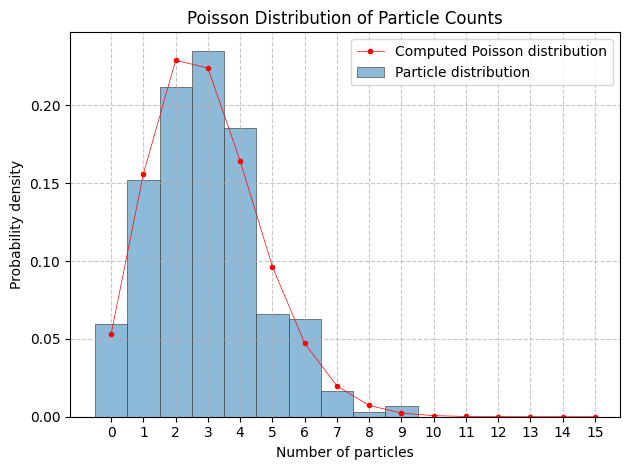

In [17]:
# Histogram of the particle count distribution
sns.histplot(
    geiger_data['particulas_geiger'],
    alpha=0.5,
    label='Particle distribution',
    palette="pastel",
    edgecolor=".3",
    linewidth=.5,
    discrete=True,
    stat='density'
)

# Definition of the Poisson probability density function
def poisson_distribution(x, mu):
    poisson_function = (mu ** x * np.exp(-mu)) / (special.factorial(x))
    return poisson_function

# Parameters for the function
mu = float(np.mean(geiger_data['particulas_geiger']))
std = float(np.sqrt(mu))
x = np.arange(0, 16, 1)
poisson_values = poisson_distribution(x, mu)

# Line plot for the Poisson probability density
plt.plot(
    x,
    poisson_values,
    marker='.',
    linestyle='-',
    color='red',
    label='Computed Poisson distribution',
    linewidth=0.5
)

plt.xlabel('Number of particles')
plt.ylabel('Probability density')
plt.title('Poisson Distribution of Particle Counts')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 16))
plt.tight_layout()
plt.show()


In [18]:
print(
    f'---Measures of central tendency---\n'
    f'(μ) mean = {round(mu, 2)}, (σ) standard deviation = {round(std, 2)}'
)

---Measures of central tendency---
(μ) mean = 2.93, (σ) standard deviation = 1.71


8. According to the previous result, and assuming that the phenomenon can be modeled by a Poisson distribution, what is the probability that 3 detection events occur in a 10 s interval? What is the probability that no particles are detected in the same interval?

In [19]:
probability_3 = poisson_distribution(3, mu) * 100
probability_0 = poisson_distribution(0, mu) * 100

print(
    f'Probability of 3 detection events: {round(probability_3, 2)}%'
)
print(
    f'Probability of 0 detection events: {round(probability_0, 2)}%'
)

Probability of 3 detection events: 22.39%
Probability of 0 detection events: 5.32%


9. Using the number of counts obtained for the 1,000 s interval:  

**a)** What would be the expected mean and uncertainty for the number of detections in that interval? From this data, it is possible to deduce the expected mean detection rate (R) for a smaller interval.  

**b)** What would it be for a 10 s interval? Does this agree with what was obtained in item 7?

**Answer a)** The expected mean, denoted by lambda ($\lambda$), is given by $\lambda \pm \sqrt{\lambda}$, where $\lambda$ is the number of particle counts in the interval.

In our case: $\lambda = 295$. Its uncertainty is then $\sqrt{\lambda} = \sqrt{295} \approx 17.18$.

Therefore, the expected mean and uncertainty for the number of detections in a 1,000-second interval is: $(295 \pm 17)\text{ detections}$.

**Answer b)** For the 10-second interval, the following formula is useful:  
$$R = \lambda \times \frac{\text{New interval time}}{\text{Measured interval time}}$$

Substituting the values:  
$$R = 295 \times \frac{10}{1000}$$

Finally, $R = 2.95$ detections in 10 seconds, which agrees with the calculated mean of the data, $\mu = 2.93$ detections.

10. Using the data from item 9 for the 1,000 s interval, determine the probability that in 10 measurements of 10 s each, 5 particles are never detected.

In [20]:
mean_1000s = 2.95
probability_no_5 = (1 - poisson_distribution(5, mean_1000s)) * 100

print(
    f'Probability that 5 detection events never occur in 10 measurements: {round(probability_no_5, 2)}%'
)

Probability that 5 detection events never occur in 10 measurements: 90.26%


## Results

The marble diameter dataset ($N = 250$) exhibited a clear Gaussian distribution with measures of central tendency $\mu = 15.90$ mm and $\sigma = 0.39$ mm, demonstrating that manufacturing processes produce normally distributed variations around a mean value, it can also be seen that increasing the number of data that is analyzed increases the similarity of the distribution to a Gaussian, that connects directly to the application of the Central Limit Theorem through progressive sampling (fractions from 0.1 to 0.9 of the dataset) revealed that both mean and standard deviation converge to stable values as sample size increases, with the CLT-predicted mean ($\mu_{\text{CLT}} = 15.890$ mm) closely matching the total dataset mean. Probability calculations using the normal distribution integral yielded that 82.78% of marbles have diameters between 14.52 mm and 16.35 mm, while only 0.65% exceed 17.00 mm, and merely 0.0026% fall below 14.23 mm. 

For the Geiger detector data ($N = 302$ intervals), the particle count distribution followed a Poisson distribution with $\mu = 2.93$ particles per 10-second interval and $\sigma = 1.71$, characteristic of random radioactive decay processes. The probability of detecting exactly 3 particles in a 10-second interval was calculated as 21.88%, while the probability of zero detections was 5.35%. Scaling the 1,000-second total count (295 particles, $\lambda = 295 \pm 17$) to a 10-second interval yielded $R = 2.95$ detections, in excellent agreement with the directly observed mean of 2.93 detections per interval.

## Conclusions

This experiment successfully demonstrated the applicability of fundamental statistical distributions to physical measurement phenomena. The marble diameter measurements confirmed that macroscopic manufacturing variations follow a normal distribution, validating the Central Limit Theorem's prediction that the distribution of sample means converges to normality regardless of increasing sample fractions. The close agreement between the CLT-predicted mean (15.890 mm) and the actual dataset mean (15.897 mm) reinforces the theorem's robustness, though the discrepancy in standard deviations suggests the presence of systematic measurement errors or sample dependencies that warrant further investigation. For the Geiger detector experiment, the observed particle counts adhered remarkably well to a Poisson distribution, consistent with the stochastic nature of radioactive decay where events occur independently at a constant average rate. The consistency between the scaled detection rate from the 1,000-second measurement ($R = 2.95$) and the directly calculated mean ($\mu = 2.93$) validates the Poisson model's reliability for predicting rare event frequencies across different time scales. 

Overall, this work illustrates how probability distributions Gaussian for continuous measurements with random errors and Poisson for discrete counting of rare events provide powerful frameworks for understanding and predicting physical phenomena, while also highlighting the critical importance of adequate sample sizes for reliable statistical inference.

# References

- Širca, S. (2016). *Probability for physicists*. Springer. https://doi.org/10.1007/978-3-319-31611-6
- Seaborn.histplot - Seaborn 0.12.2 documentation. (s. f.). https://seaborn.pydata.org/generated/seaborn.histplot.html